# KNN -Breast Cancer dataset

In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
cancer = load_breast_cancer()

In [12]:
# screen the dataset

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
cancer.data.shape

(569, 30)

In [15]:
# there are 30 predictors

In [16]:
list1 = list(cancer.feature_names)

In [17]:
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# see scaling per feature

In [19]:
df0.describe().iloc[3:,:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.00000,0.00000,0.1060,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0000,0.00000,0.1565,0.05504
25%,11.700,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.05770,...,13.01,21.08,84.11,515.3,0.11660,0.14720,0.1145,0.06493,0.2504,0.07146
50%,13.370,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,0.1792,0.06154,...,14.97,25.41,97.66,686.5,0.13130,0.21190,0.2267,0.09993,0.2822,0.08004
75%,15.780,21.80,104.10,782.7,0.10530,0.13040,0.13070,0.07400,0.1957,0.06612,...,18.79,29.72,125.40,1084.0,0.14600,0.33910,0.3829,0.16140,0.3179,0.09208
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.42680,0.20120,0.3040,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.2520,0.29100,0.6638,0.20750


In [20]:
# 1st try no preprocessing

In [21]:
df = pd.DataFrame(cancer.target,columns = ['tumor'])

In [22]:
pd.value_counts(df.tumor)

1    357
0    212
Name: tumor, dtype: int64

In [23]:
# 1 is for benign tumor, 0 for malign tumor

In [24]:
# predictor names

In [25]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [27]:
cancer.target.shape

(569,)

## Validation Approach

In [28]:
# instantiate the problem = set the parameter values

In [29]:
model = KNeighborsClassifier(n_neighbors=3)

In [30]:
# split dataset (30% is default)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, 
                                                 stratify=cancer.target, 
                                                 random_state=66)

In [32]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
# predict

In [34]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
n = len(cancer.target)
n

569

In [36]:
m = len(y_test)

In [37]:
m/n

0.2513181019332162

In [38]:
# actually test set is 25% of dataset

In [39]:
# accuracy rate

In [40]:
model.score(X_test, y_test)

0.9230769230769231

In [41]:
# loop changing number of neighbors

In [42]:
# empty lists

In [43]:
training_accuracy = []
test_accuracy = []

In [44]:
nn = range(1,20)

In [45]:
for i in nn:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [46]:
# plot

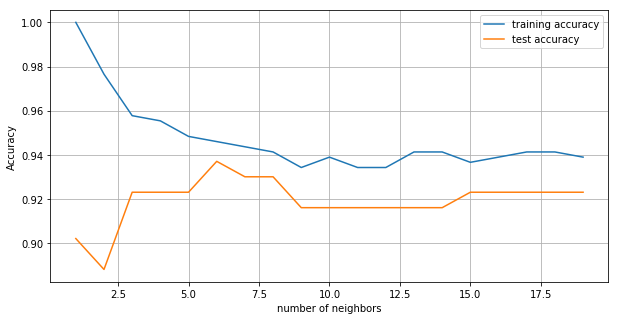

In [47]:
plt.figure(figsize=(10,5))
plt.plot(nn, training_accuracy, label="training accuracy")
plt.plot(nn, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()

In [48]:
# Validation approach suggests k=6 neighbors (unusual)

In [49]:
max(test_accuracy)

0.9370629370629371

## Preprocessing -predictors only-

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
model = KNeighborsClassifier(n_neighbors=3)

In [55]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
model.predict(X_test_scaled);

In [57]:
model.score(X_test_scaled, y_test)

0.958041958041958

In [58]:
nn = range(1,25)

In [59]:
training_accuracy = []
test_accuracy = []

In [60]:
for i in nn:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    training_accuracy.append(model.score(X_train_scaled, y_train))
    test_accuracy.append(model.score(X_test_scaled, y_test))

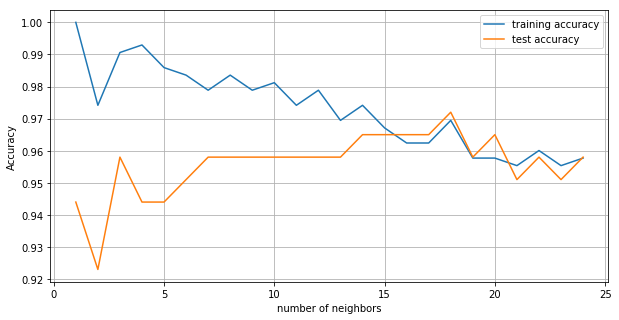

In [61]:
plt.figure(figsize=(10,5))
plt.plot(nn, training_accuracy, label="training accuracy")
plt.plot(nn, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()

In [62]:
max(test_accuracy)

0.972027972027972

In [63]:
# improved from 0.937 with no scaling to 0.972

In [64]:
# with scaling, best number of neighbors k = 18

### k-fold cross validation

In [65]:
X = cancer.data

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
X_scaled = scaler.transform(X)

In [69]:
y = cancer.target

In [70]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [71]:
model = KNeighborsClassifier(n_neighbors=3)

In [72]:
scores = cross_val_score(model,X_scaled,y,cv=kfold)

In [73]:
scores.mean()

0.9701443875174661

In [74]:
# loop

In [75]:
a_rate = []

In [76]:
for i in nn:
    model = KNeighborsClassifier(n_neighbors=i)
    rates = cross_val_score(model,X_scaled,y,cv=kfold)
    a_rate.append(rates.mean())

(0.9, 1)

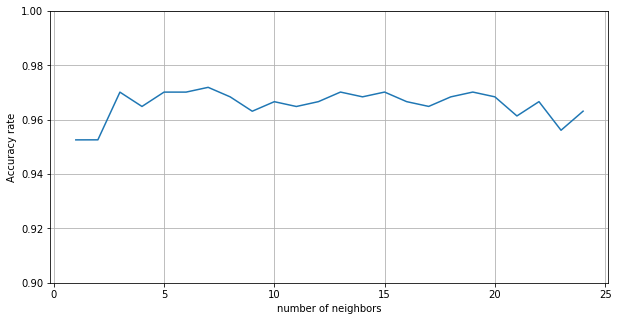

In [77]:
plt.figure(figsize=(10,5))
plt.plot(nn,a_rate)
plt.ylabel("Accuracy rate")
plt.xlabel("number of neighbors")
plt.grid()
plt.ylim(0.9,1)

In [78]:
max(a_rate)

0.971914299021891

In [79]:
array1 = np.asarray(a_rate)

In [80]:
array1.argmax()

6

In [81]:
# k-fold cross validation selects k=7 neighbors

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(solver='lbfgs')

In [84]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [85]:
a_rates = cross_val_score(model,X,y,cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [86]:
a_rates = cross_val_score(model,X_scaled,y,cv=kfold)

In [87]:
a_rates.mean()

0.9649122807017545

In [88]:
# Logistic Regression outperformed by KNN